# Analyzing Global Temperatures

This project analyzes local temperature trends to overall global temperature trends.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
ldf = pd.read_csv('data/sandiegotemp.csv')
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      165 non-null    int64  
 1   avg_temp  165 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [48]:
ldf

,year,avg_temp
0,1849,16.03
1,1850,15.55
2,1851,15.66
3,1852,16.06
4,1853,16.69
...,...,...
160,2009,17.03
161,2010,16.19
162,2011,16.26
163,2012,17.20


In [49]:
gdf = pd.read_csv('data/globaltemp.csv')
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [50]:
gdf=gdf.loc[gdf['year']>1848]
gdf

,year,avg_temp
99,1849,7.98
100,1850,7.90
101,1851,8.18
102,1852,8.10
103,1853,8.04
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


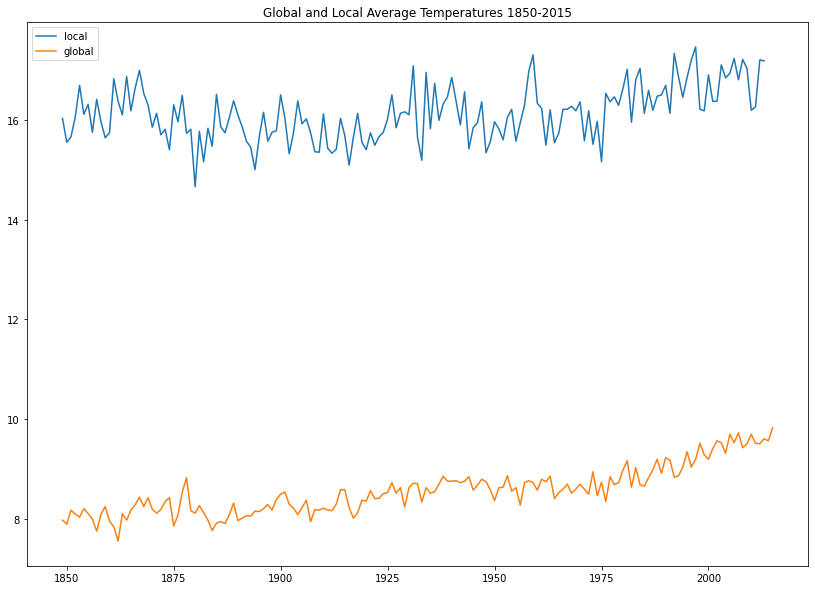

In [51]:
from cProfile import label

from matplotlib.pyplot import legend


plt.figure(figsize=(14,10))
plt.title('Global and Local Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['avg_temp'], label='San Diego Temperatures')
plt.plot(gdf['year'], gdf['avg_temp'], label='Global Temperatures')
plt.legend(('local', 'global'), loc='upper left')

In [57]:
round(gdf['avg_temp'].max() - gdf['avg_temp'].min(), 3)


2.27

In [58]:
round(ldf['avg_temp'].max() - ldf['avg_temp'].min(), 3)


2.8

In [52]:
gdf['10 year MA']=gdf.avg_temp.rolling(10).mean()
gdf

,year,avg_temp,10 year MA
99,1849,7.98,NaN
100,1850,7.90,NaN
101,1851,8.18,NaN
102,1852,8.10,NaN
103,1853,8.04,NaN
...,...,...,...
261,2011,9.52,9.554
262,2012,9.51,9.548
263,2013,9.61,9.556
264,2014,9.57,9.581


In [53]:
ldf['10 year MA']=ldf.avg_temp.rolling(10).mean()
ldf

,year,avg_temp,10 year MA
0,1849,16.03,NaN
1,1850,15.55,NaN
2,1851,15.66,NaN
3,1852,16.06,NaN
4,1853,16.69,NaN
...,...,...,...
160,2009,17.03,16.878
161,2010,16.19,16.807
162,2011,16.26,16.796
163,2012,17.20,16.879


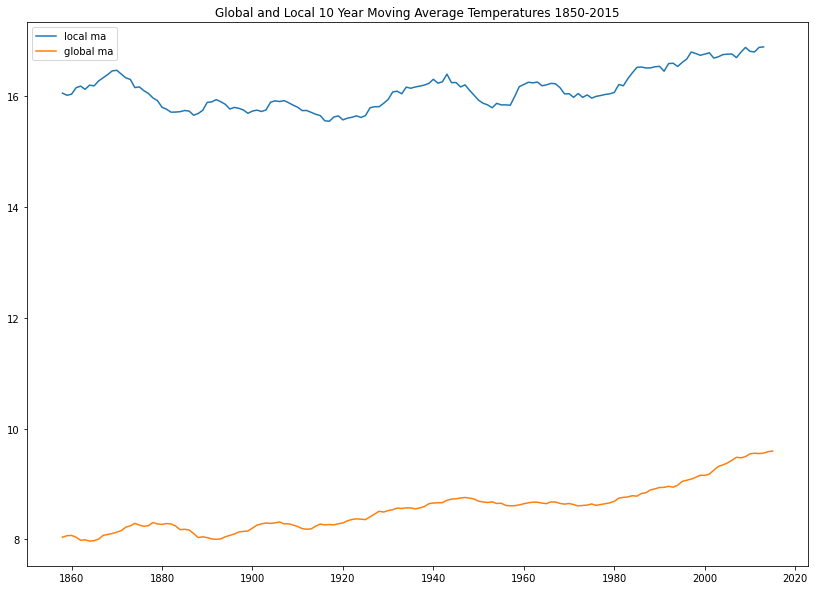

In [55]:
plt.figure(figsize=(14,10))
plt.title('Global and Local 10 Year Moving Average Temperatures 1850-2015')
plt.plot(ldf['year'], ldf['10 year MA'], label='San Diego MA Temperatures')
plt.plot(gdf['year'], gdf['10 year MA'], label='Global MA Temperatures')
plt.legend(('local ma', 'global ma'), loc='upper left')